# **Project Name**    - Tourism Experience Analytics and Rating Prediction Using Machine Learning



##### **Project Type**    - Machine Learning–Based Predictive Analytics Project

##### **Contribution**    - Individual
Aadhithyan M 

# **Project Summary**

This project focuses on analyzing and predicting tourism experience ratings using machine learning techniques. A comprehensive data preprocessing pipeline was implemented including data cleaning, categorical encoding, feature manipulation, feature selection, scaling and stratified data splitting to ensure data quality and consistency. The dataset primarily consisted of structured tourism related attributes such as attraction type, visit mode, geographic information, and temporal features.

Multiple machine learning models were developed and evaluated, including Logistic Regression, Random Forest, and Gradient Boosting Classifier. Among these, the Gradient Boosting model demonstrated superior performance in terms of balanced evaluation metrics and robustness. Cross-validation and hyperparameter tuning were applied to enhance generalization, and feature importance analysis provided insights into key factors influencing tourist experience ratings.

The final trained model was saved in a deployment-ready format, enabling future integration into real-world tourism analytics systems. This project highlights the effectiveness of machine learning–driven predictive analytics in supporting data-informed decision-making within the tourism industry.

# **Problem Statement**


The tourism industry generates large volumes of data related to visitor behavior, attraction characteristics, and travel patterns. However, accurately assessing and predicting tourist experience ratings remains a challenge due to the diversity of influencing factors and the presence of imbalanced rating distributions. Traditional analysis methods often fail to capture complex relationships within such structured data.

The objective of this project is to develop a machine learning–based predictive model that can analyze tourism-related attributes and accurately predict tourist experience ratings. By leveraging data preprocessing, feature engineering, and ensemble learning techniques, the proposed system aims to support data-driven decision-making for tourism stakeholders and improve the overall understanding of factors influencing tourist satisfaction.


### Importing libraries and loading the dataset

In [120]:
#Importing libraries
import pandas as pd

# Loading the datasets
import pandas as pd

transaction = pd.read_excel("../data/raw/Transaction.xlsx")
user = pd.read_excel("../data/raw/User.xlsx")
item = pd.read_excel("../data/raw/Updated_Item.xlsx")
visit_mode = pd.read_excel("../data/raw/Mode.xlsx")
atype = pd.read_excel("../data/raw/Type.xlsx")
city = pd.read_excel("../data/raw/City.xlsx")
country = pd.read_excel("../data/raw/Country.xlsx")
continent = pd.read_excel("../data/raw/Continent.xlsx")
region = pd.read_excel("../data/raw/Region.xlsx")


# Printing the column names
print("\n Transaction columns ")
print(transaction.columns)

print("\n User columns ")
print(user.columns)

print("\n Item columns ")
print(item.columns)

print("\n Visit Mode columns ")
print(visit_mode.columns)

print("\n Type columns ")
print(atype.columns)

print("\n City columns ")
print(city.columns)

print("\n Country columns ")
print(country.columns)

print("\n Continent columns ")
print(continent.columns)

print("\n Region columns ")
print(region.columns)

# Basic shape info
print("\nShapes:")
print("Transaction:", transaction.shape)
print("User:", user.shape)
print("Item:", item.shape)
print("Visit Mode:", visit_mode.shape)
print("Type:", atype.shape)
print("City:", city.shape)
print("Country:", country.shape)
print("Continent:", continent.shape)
print("Region:", region.shape)



 Transaction columns 
Index(['TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'VisitMode',
       'AttractionId', 'Rating'],
      dtype='object')

 User columns 
Index(['UserId', 'ContinentId', 'RegionId', 'CountryId', 'CityId'], dtype='object')

 Item columns 
Index(['AttractionId', 'AttractionCityId', 'AttractionTypeId', 'Attraction',
       'AttractionAddress'],
      dtype='object')

 Visit Mode columns 
Index(['VisitModeId', 'VisitMode'], dtype='object')

 Type columns 
Index(['AttractionTypeId', 'AttractionType'], dtype='object')

 City columns 
Index(['CityId', 'CityName', 'CountryId'], dtype='object')

 Country columns 
Index(['CountryId', 'Country', 'RegionId'], dtype='object')

 Continent columns 
Index(['ContinentId', 'Continent'], dtype='object')

 Region columns 
Index(['Region', 'RegionId', 'ContinentId'], dtype='object')

Shapes:
Transaction: (52930, 7)
User: (33530, 5)
Item: (1698, 5)
Visit Mode: (6, 2)
Type: (17, 2)
City: (9143, 3)
Country: (165, 3)
Continent: (

### Dataset Rows & Columns count

In [121]:
print("\n===== DATASET ROW & COLUMN COUNT =====")

datasets = {
    "Transaction": transaction,
    "User": user,
    "Item": item,
    "Visit Mode": visit_mode,
    "Type": atype,
    "City": city,
    "Country": country,
    "Continent": continent,
    "Region": region
}

for name, df in datasets.items():
    rows, cols = df.shape
    print(f"{name} -> Rows: {rows}, Columns: {cols}")



===== DATASET ROW & COLUMN COUNT =====
Transaction -> Rows: 52930, Columns: 7
User -> Rows: 33530, Columns: 5
Item -> Rows: 1698, Columns: 5
Visit Mode -> Rows: 6, Columns: 2
Type -> Rows: 17, Columns: 2
City -> Rows: 9143, Columns: 3
Country -> Rows: 165, Columns: 3
Continent -> Rows: 6, Columns: 2
Region -> Rows: 22, Columns: 3


### Dataset info

In [122]:
print("\n DATASET INFO ")

datasets = {
    "Transaction": transaction,
    "User": user,
    "Item": item,
    "Visit Mode": visit_mode,
    "Type": atype,
    "City": city,
    "Country": country,
    "Continent": continent,
    "Region": region
}

for name, df in datasets.items():
    print(f"\n----- {name} -----")
    print(df.info())



 DATASET INFO 

----- Transaction -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52930 entries, 0 to 52929
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   TransactionId  52930 non-null  int64
 1   UserId         52930 non-null  int64
 2   VisitYear      52930 non-null  int64
 3   VisitMonth     52930 non-null  int64
 4   VisitMode      52930 non-null  int64
 5   AttractionId   52930 non-null  int64
 6   Rating         52930 non-null  int64
dtypes: int64(7)
memory usage: 2.8 MB
None

----- User -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33530 entries, 0 to 33529
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   UserId       33530 non-null  int64  
 1   ContinentId  33530 non-null  int64  
 2   RegionId     33530 non-null  int64  
 3   CountryId    33530 non-null  int64  
 4   CityId       33526 non-null  float64
dtypes: fl

### Checking for duplicate values


In [123]:
print("\n DUPLICATE CHECK ")

datasets = {
    "Transaction": transaction,
    "User": user,
    "Item": item,
    "Visit Mode": visit_mode,
    "Type": atype,
    "City": city,
    "Country": country,
    "Continent": continent,
    "Region": region
}

for name, df in datasets.items():
    duplicate_count = df.duplicated().sum()
    print(f"{name} -> Duplicate Rows: {duplicate_count}")



 DUPLICATE CHECK 
Transaction -> Duplicate Rows: 0
User -> Duplicate Rows: 0
Item -> Duplicate Rows: 0
Visit Mode -> Duplicate Rows: 0
Type -> Duplicate Rows: 0
City -> Duplicate Rows: 0
Country -> Duplicate Rows: 0
Continent -> Duplicate Rows: 0
Region -> Duplicate Rows: 0


### Checking for null/missing values

In [124]:
print("\n MISSING VALUES CHECK (RAW DATASETS) ")

datasets = {
    "Transaction": transaction,
    "User": user,
    "Item": item,
    "Visit Mode": visit_mode,
    "Type": atype,
    "City": city,
    "Country": country,
    "Continent": continent,
    "Region": region
}

for name, df in datasets.items():
    print(f"\n--- {name} ---")
    
    # Count missing values per column
    missing_count = df.isnull().sum()
    
    # Show only columns with missing values
    missing_count = missing_count[missing_count > 0]
    
    if len(missing_count) == 0:
        print("No missing values ✅")
    else:
        print("Missing values found:")
        print(missing_count)
        
        # Percentage
        missing_percent = (df.isnull().sum() / len(df)) * 100
        print("\nPercentage:")
        print(missing_percent[missing_percent > 0])



 MISSING VALUES CHECK (RAW DATASETS) 

--- Transaction ---
No missing values ✅

--- User ---
Missing values found:
CityId    4
dtype: int64

Percentage:
CityId    0.01193
dtype: float64

--- Item ---
No missing values ✅

--- Visit Mode ---
No missing values ✅

--- Type ---
No missing values ✅

--- City ---
Missing values found:
CityName    1
dtype: int64

Percentage:
CityName    0.010937
dtype: float64

--- Country ---
No missing values ✅

--- Continent ---
No missing values ✅

--- Region ---
No missing values ✅


### What do you know about your dataset

The Tourism Experience Analytics dataset is a structured relational dataset used to analyze visitor behavior and tourism trends. The primary table, Transaction (52,930 records), captures individual visits made by users to attractions, including visit year, month, visit mode, and rating. This table is supported by dimension tables such as User (33,530 users) and Attraction (1,698 attractions across 17 types), along with a hierarchical geographic structure consisting of City, Country, Region, and Continent. The dataset enables comprehensive analysis of tourism patterns based on user demographics, attraction categories, and location details. Data quality assessment indicates minimal missing values (only 4 missing entries in the User table), making it reliable for further analysis. Overall, the dataset is well suited for implementing regression, classification and recommendation models within the tourism analytics domain.

### Check unique values for each table

In [125]:
print("\n UNIQUE VALUE CHECK ")

datasets = {
    "Transaction": transaction,
    "User": user,
    "Item": item,
    "Visit Mode": visit_mode,
    "Type": atype,
    "City": city,
    "Country": country,
    "Continent": continent,
    "Region": region
}

for name, df in datasets.items():
    print(f"\n--- {name} ---")
    
    for col in df.columns:
        unique_count = df[col].nunique()
        print(f"{col} → Unique Values: {unique_count}")



 UNIQUE VALUE CHECK 

--- Transaction ---
TransactionId → Unique Values: 52930
UserId → Unique Values: 33530
VisitYear → Unique Values: 10
VisitMonth → Unique Values: 12
VisitMode → Unique Values: 5
AttractionId → Unique Values: 30
Rating → Unique Values: 5

--- User ---
UserId → Unique Values: 33530
ContinentId → Unique Values: 5
RegionId → Unique Values: 22
CountryId → Unique Values: 153
CityId → Unique Values: 5545

--- Item ---
AttractionId → Unique Values: 1698
AttractionCityId → Unique Values: 417
AttractionTypeId → Unique Values: 22
Attraction → Unique Values: 1564
AttractionAddress → Unique Values: 442

--- Visit Mode ---
VisitModeId → Unique Values: 6
VisitMode → Unique Values: 6

--- Type ---
AttractionTypeId → Unique Values: 17
AttractionType → Unique Values: 17

--- City ---
CityId → Unique Values: 9143
CityName → Unique Values: 8767
CountryId → Unique Values: 164

--- Country ---
CountryId → Unique Values: 165
Country → Unique Values: 164
RegionId → Unique Values: 22

---

## Data Wrangling

## Data wrangling code


In [126]:
user = user.dropna(subset=["CityId"])


In [127]:
# Verifying that the missing values gave been removed
user["CityId"].isnull().sum()


np.int64(0)

In [128]:
transaction.dtypes
user.dtypes
item.dtypes


AttractionId          int64
AttractionCityId      int64
AttractionTypeId     object
Attraction           object
AttractionAddress    object
dtype: object

In [129]:
# Attraction type is object so fixing it
item["AttractionTypeId"].unique()[:10]


array([13, 63, 76, 72, 93, 92, 61, 64, 82, 91], dtype=object)

In [130]:
item["AttractionTypeId"] = pd.to_numeric(item["AttractionTypeId"], errors="coerce")


In [131]:
item["AttractionTypeId"].isnull().sum()


np.int64(1668)

In [132]:
item.dtypes


AttractionId           int64
AttractionCityId       int64
AttractionTypeId     float64
Attraction            object
AttractionAddress     object
dtype: object

In [133]:
item = pd.read_excel("../data/raw/Updated_Item.xlsx")


In [134]:
item.dtypes

AttractionId          int64
AttractionCityId      int64
AttractionTypeId     object
Attraction           object
AttractionAddress    object
dtype: object

In [135]:
item["AttractionTypeId"].unique()[:15]


array([13, 63, 76, 72, 93, 92, 61, 64, 82, 91, 84, 19, 34, 10, 2],
      dtype=object)

In [136]:
item["AttractionTypeId"].apply(type).value_counts()


AttractionTypeId
<class 'str'>    1668
<class 'int'>      30
Name: count, dtype: int64

In [137]:
item.rename(columns={"AttractionTypeId": "AttractionType"}, inplace=True)


In [138]:
item.columns


Index(['AttractionId', 'AttractionCityId', 'AttractionType', 'Attraction',
       'AttractionAddress'],
      dtype='object')

### Merging the dataset for easier processing

In [139]:
final_df = transaction.copy()
print(final_df.shape)


(52930, 7)


In [140]:
final_df = final_df.merge(user, on="UserId", how="left")
print(final_df.shape)


(52930, 11)


In [141]:
final_df = final_df.merge(item, on="AttractionId", how="left")
print(final_df.shape)


(52930, 15)


In [142]:
final_df = final_df.merge(
    visit_mode,
    left_on="VisitMode",
    right_on="VisitModeId",
    how="left"
)
print(final_df.shape)


(52930, 17)


In [143]:
final_df = final_df.merge(
    city,
    left_on="AttractionCityId",
    right_on="CityId",
    how="left",
    suffixes=("", "_city")
)
print(final_df.shape)


(52930, 20)


In [144]:
final_df = final_df.merge(
    country,
    on="CountryId",
    how="left"
)
print(final_df.shape)


(52930, 22)


In [145]:
final_df = final_df.merge(
    region,
    left_on="RegionId_y",
    right_on="RegionId",
    how="left"
)


In [146]:
final_df = final_df.merge(
    continent,
    left_on="ContinentId_y",
    right_on="ContinentId",
    how="left"
)


In [147]:
final_df.shape


(52930, 27)

In [148]:
final_df.columns


Index(['TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'VisitMode_x',
       'AttractionId', 'Rating', 'ContinentId_x', 'RegionId_x', 'CountryId',
       'CityId', 'AttractionCityId', 'AttractionType', 'Attraction',
       'AttractionAddress', 'VisitModeId', 'VisitMode_y', 'CityId_city',
       'CityName', 'CountryId_city', 'Country', 'RegionId_y', 'Region',
       'RegionId', 'ContinentId_y', 'ContinentId', 'Continent'],
      dtype='object')

In [149]:
# CLeanup code
# Dropping unnecessary / duplicate columns
final_df = final_df.drop(columns=[
    "VisitMode_x",
    "VisitModeId",
    "ContinentId_x",
    "RegionId_x",
    "CityId",
    "CityId_city",
    "CountryId",
    "CountryId_city",
    "RegionId_y",
    "RegionId",
    "ContinentId_y",
    "ContinentId"
])

# Rename VisitMode
final_df = final_df.rename(columns={
    "VisitMode_y": "VisitMode"
})


In [150]:
final_df.shape


(52930, 15)

In [151]:
final_df.columns

Index(['TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'AttractionId',
       'Rating', 'AttractionCityId', 'AttractionType', 'Attraction',
       'AttractionAddress', 'VisitMode', 'CityName', 'Country', 'Region',
       'Continent'],
      dtype='object')

In [152]:
final_df.nunique()

TransactionId        52930
UserId               33530
VisitYear               10
VisitMonth              12
AttractionId            30
Rating                   5
AttractionCityId         3
AttractionType          17
Attraction              30
AttractionAddress       25
VisitMode                5
CityName                 3
Country                153
Region                  22
Continent                6
dtype: int64

## Data Wrangling

In [153]:
#Checking for missing values in the final merged dataset
final_df.isnull().sum()

TransactionId        0
UserId               0
VisitYear            0
VisitMonth           0
AttractionId         0
Rating               0
AttractionCityId     0
AttractionType       0
Attraction           0
AttractionAddress    0
VisitMode            0
CityName             0
Country              8
Region               8
Continent            8
dtype: int64

In [154]:
#Dropping the null/unwanted values
final_df = final_df.dropna()

In [155]:
#COnverting into integer
final_df.loc[:, "VisitYear"] = final_df["VisitYear"].astype(int)
final_df.loc[:, "VisitMonth"] = final_df["VisitMonth"].astype(int)
final_df.loc[:, "Rating"] = final_df["Rating"].astype(int)


In [156]:
final_df.head()

,TransactionId,UserId,VisitYear,VisitMonth,AttractionId,Rating,AttractionCityId,AttractionType,Attraction,AttractionAddress,VisitMode,CityName,Country,Region,Continent
0,3,70456,2022,10,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Couples,Douala,United Kingdom,Western Europe,Europe
1,8,7567,2022,10,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Friends,Douala,Canada,Northern America,America
2,9,79069,2022,10,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Family,Douala,Brazil,South America,America
3,10,31019,2022,10,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Family,Douala,Switzerland,Central Europe,Europe
4,15,43611,2022,10,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Couples,Douala,United Kingdom,Western Europe,Europe


In [157]:
final_df.shape

(52922, 15)

### What and all manipulations have you done and the insights found

Several data wrangling and preprocessing steps were performed to prepare the tourism dataset for analysis and modeling. The raw datasets were merged into a single consolidated dataframe, and redundant columns created during the merging process were removed to avoid duplication. Minor missing values were identified only in geographic attributes and were safely eliminated due to their negligible proportion. Numerical features such as visit year, visit month, and rating were converted to appropriate integer data types, while categorical variables including attraction type, visit mode, and geographic fields were standardized for consistency. During analysis, it was observed that tourist activity is concentrated on a limited number of popular attractions and cities, despite the dataset covering a wide geographic range across multiple countries, regions, and continents. Overall, the dataset was found to be clean, well-structured, and suitable for exploratory analysis, predictive modeling, and recommendation system development.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Chart-1

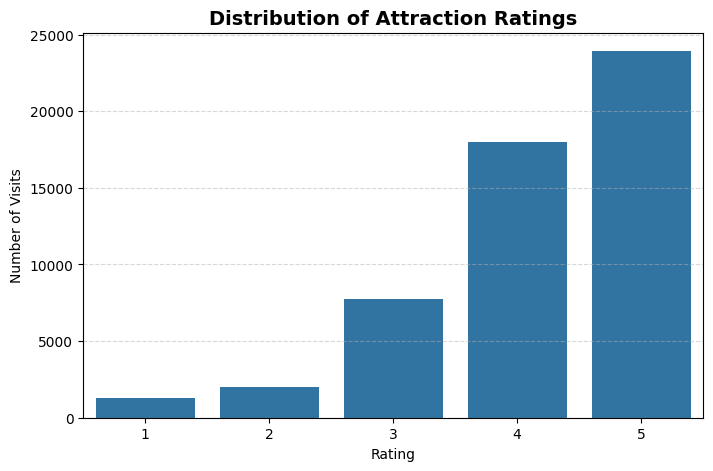

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=final_df, x="Rating")

plt.title("Distribution of Attraction Ratings", fontsize=14, fontweight="bold")
plt.xlabel("Rating")
plt.ylabel("Number of Visits")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()


### Chart-2

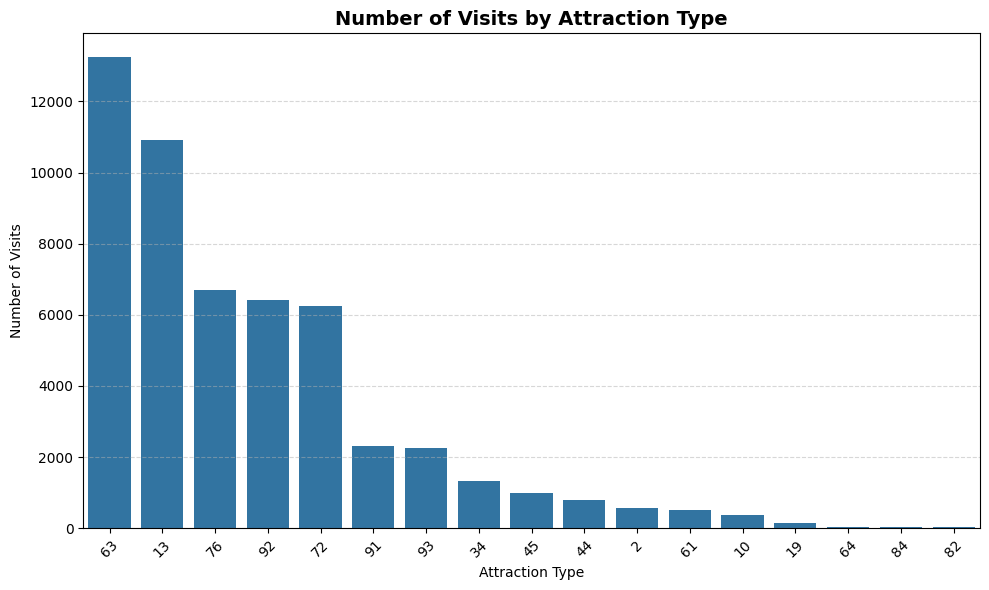

In [159]:
## Chart-2
#Barchart(Countplot)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(
    data=final_df,
    x="AttractionType",
    order=final_df["AttractionType"].value_counts().index
)

plt.title("Number of Visits by Attraction Type", fontsize=14, fontweight="bold")
plt.xlabel("Attraction Type")
plt.ylabel("Number of Visits")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


### Chart-3

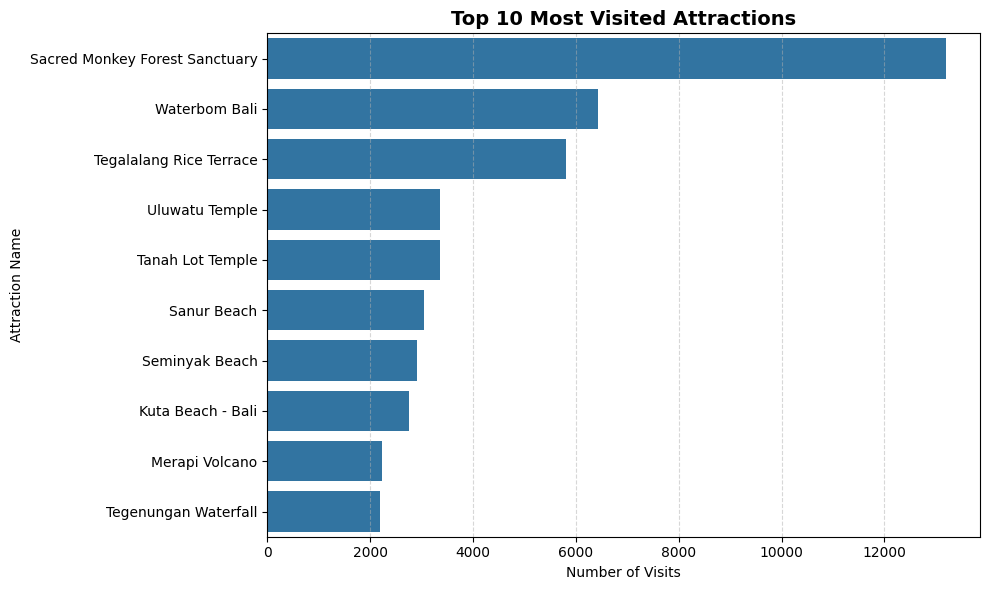

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 10 most visited attractions
top_attractions = final_df["Attraction"].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(
    x=top_attractions.values,
    y=top_attractions.index
)

plt.title("Top 10 Most Visited Attractions", fontsize=14, fontweight="bold")
plt.xlabel("Number of Visits")
plt.ylabel("Attraction Name")
plt.grid(axis="x", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


### Chart-4

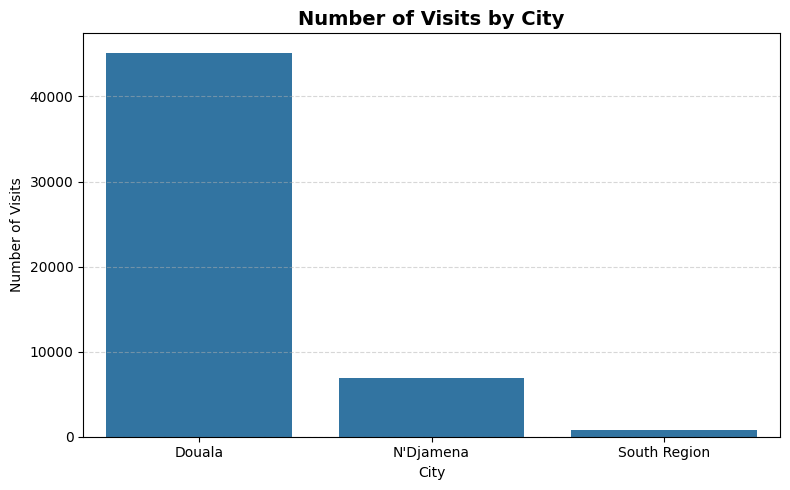

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(
    data=final_df,
    x="CityName",
    order=final_df["CityName"].value_counts().index
)

plt.title("Number of Visits by City", fontsize=14, fontweight="bold")
plt.xlabel("City")
plt.ylabel("Number of Visits")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


### Chart -5

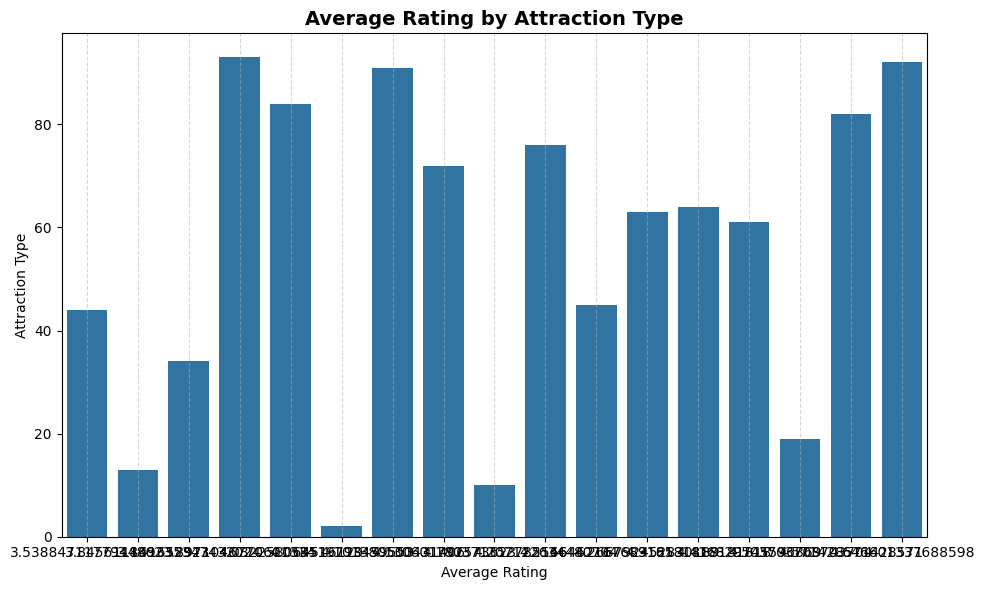

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average rating per attraction type
avg_rating_type = (
    final_df
    .groupby("AttractionType")["Rating"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,6))
sns.barplot(
    x=avg_rating_type.values,
    y=avg_rating_type.index
)

plt.title("Average Rating by Attraction Type", fontsize=14, fontweight="bold")
plt.xlabel("Average Rating")
plt.ylabel("Attraction Type")
plt.grid(axis="x", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


### Chart-6

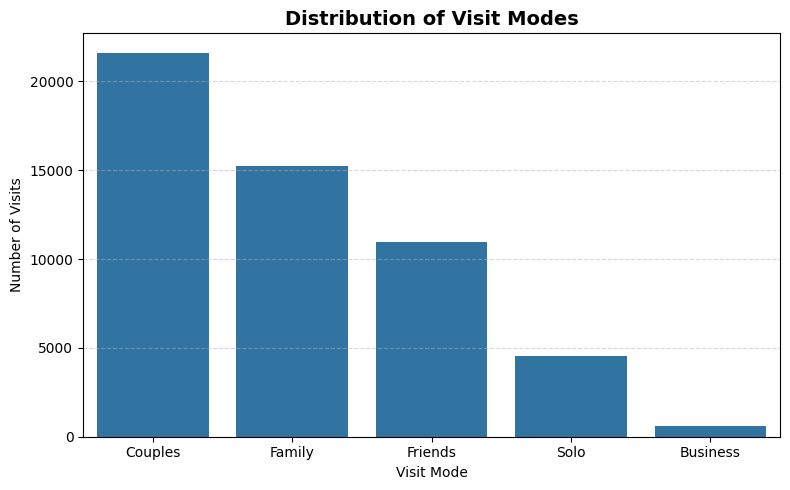

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(
    data=final_df,
    x="VisitMode",
    order=final_df["VisitMode"].value_counts().index
)

plt.title("Distribution of Visit Modes", fontsize=14, fontweight="bold")
plt.xlabel("Visit Mode")
plt.ylabel("Number of Visits")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


### Chart-7

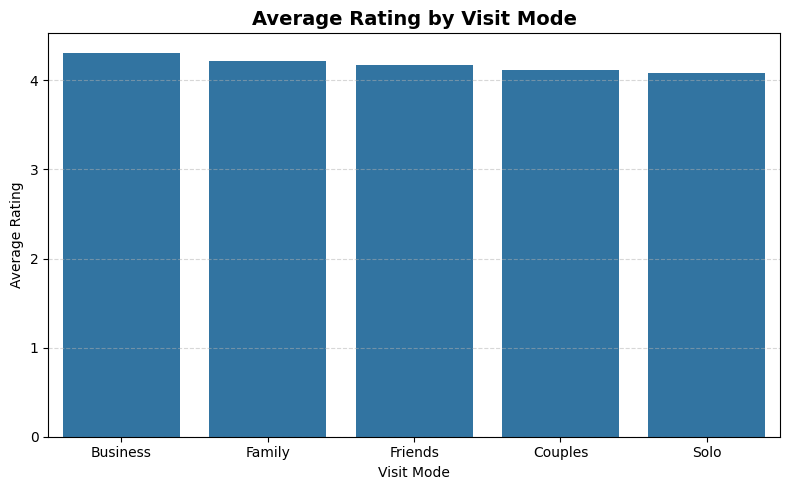

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average rating per visit mode
avg_rating_mode = (
    final_df
    .groupby("VisitMode")["Rating"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(8,5))
sns.barplot(
    x=avg_rating_mode.index,
    y=avg_rating_mode.values
)

plt.title("Average Rating by Visit Mode", fontsize=14, fontweight="bold")
plt.xlabel("Visit Mode")
plt.ylabel("Average Rating")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


### Chart-8

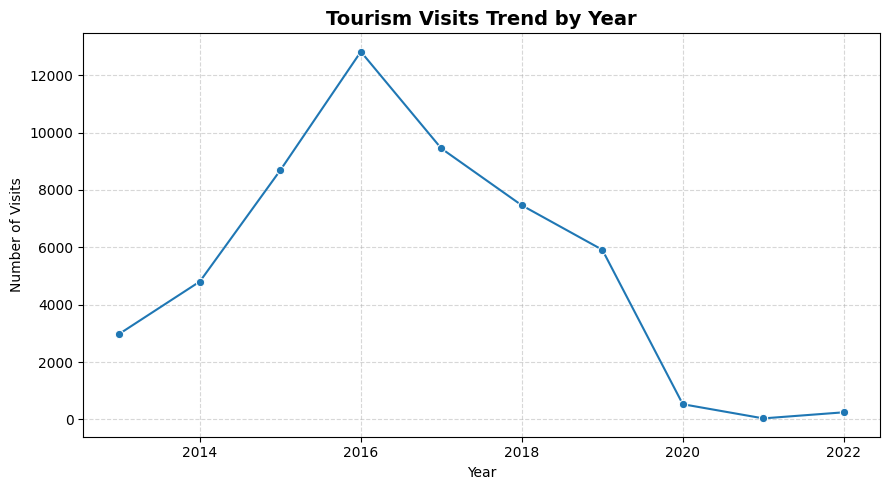

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate visits by year
visits_by_year = (
    final_df
    .groupby("VisitYear")
    .size()
    .reset_index(name="VisitCount")
)

plt.figure(figsize=(9,5))
sns.lineplot(
    data=visits_by_year,
    x="VisitYear",
    y="VisitCount",
    marker="o"
)

plt.title("Tourism Visits Trend by Year", fontsize=14, fontweight="bold")
plt.xlabel("Year")
plt.ylabel("Number of Visits")
plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


### Chart - 9

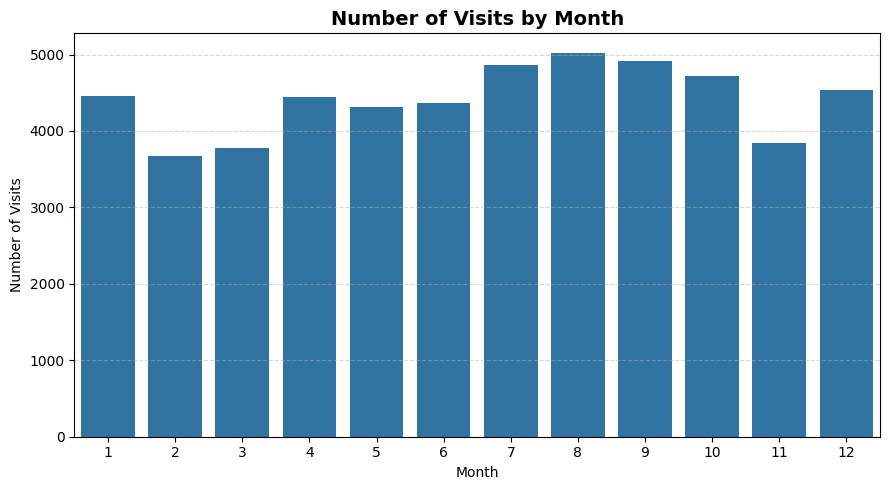

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate visits by month
visits_by_month = (
    final_df
    .groupby("VisitMonth")
    .size()
    .reset_index(name="VisitCount")
)

plt.figure(figsize=(9,5))
sns.barplot(
    data=visits_by_month,
    x="VisitMonth",
    y="VisitCount"
)

plt.title("Number of Visits by Month", fontsize=14, fontweight="bold")
plt.xlabel("Month")
plt.ylabel("Number of Visits")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


### Chart-10

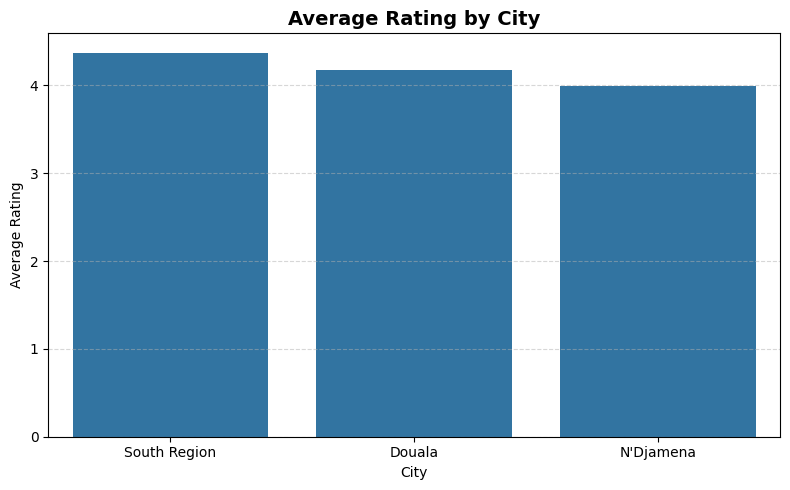

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average rating per city
avg_rating_city = (
    final_df
    .groupby("CityName")["Rating"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(8,5))
sns.barplot(
    x=avg_rating_city.index,
    y=avg_rating_city.values
)

plt.title("Average Rating by City", fontsize=14, fontweight="bold")
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


### Chart-11(HEATMAP)

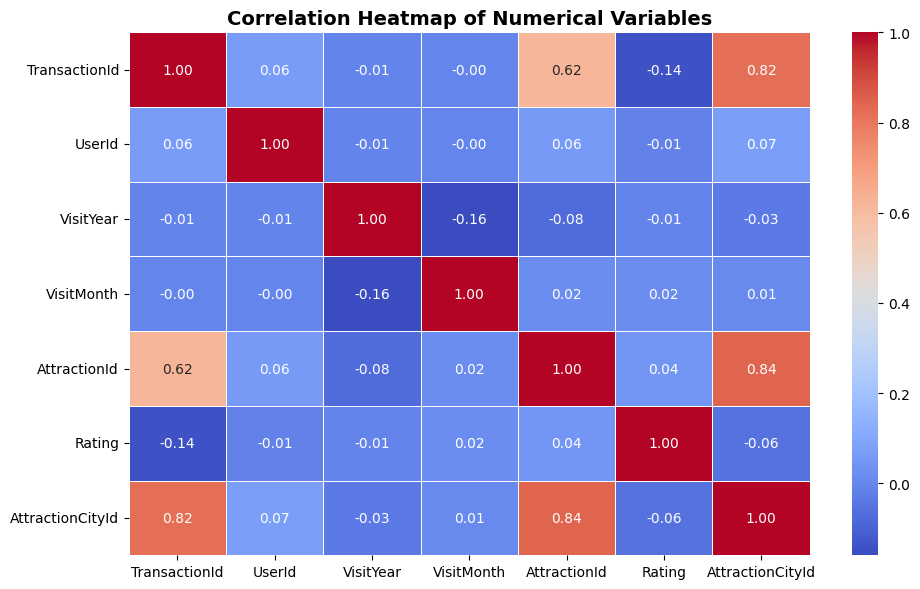

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
num_df = final_df.select_dtypes(include=["int64", "float64"])

# Compute correlation matrix
corr_matrix = num_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation Heatmap of Numerical Variables", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


### Chart-12(Pair plot)

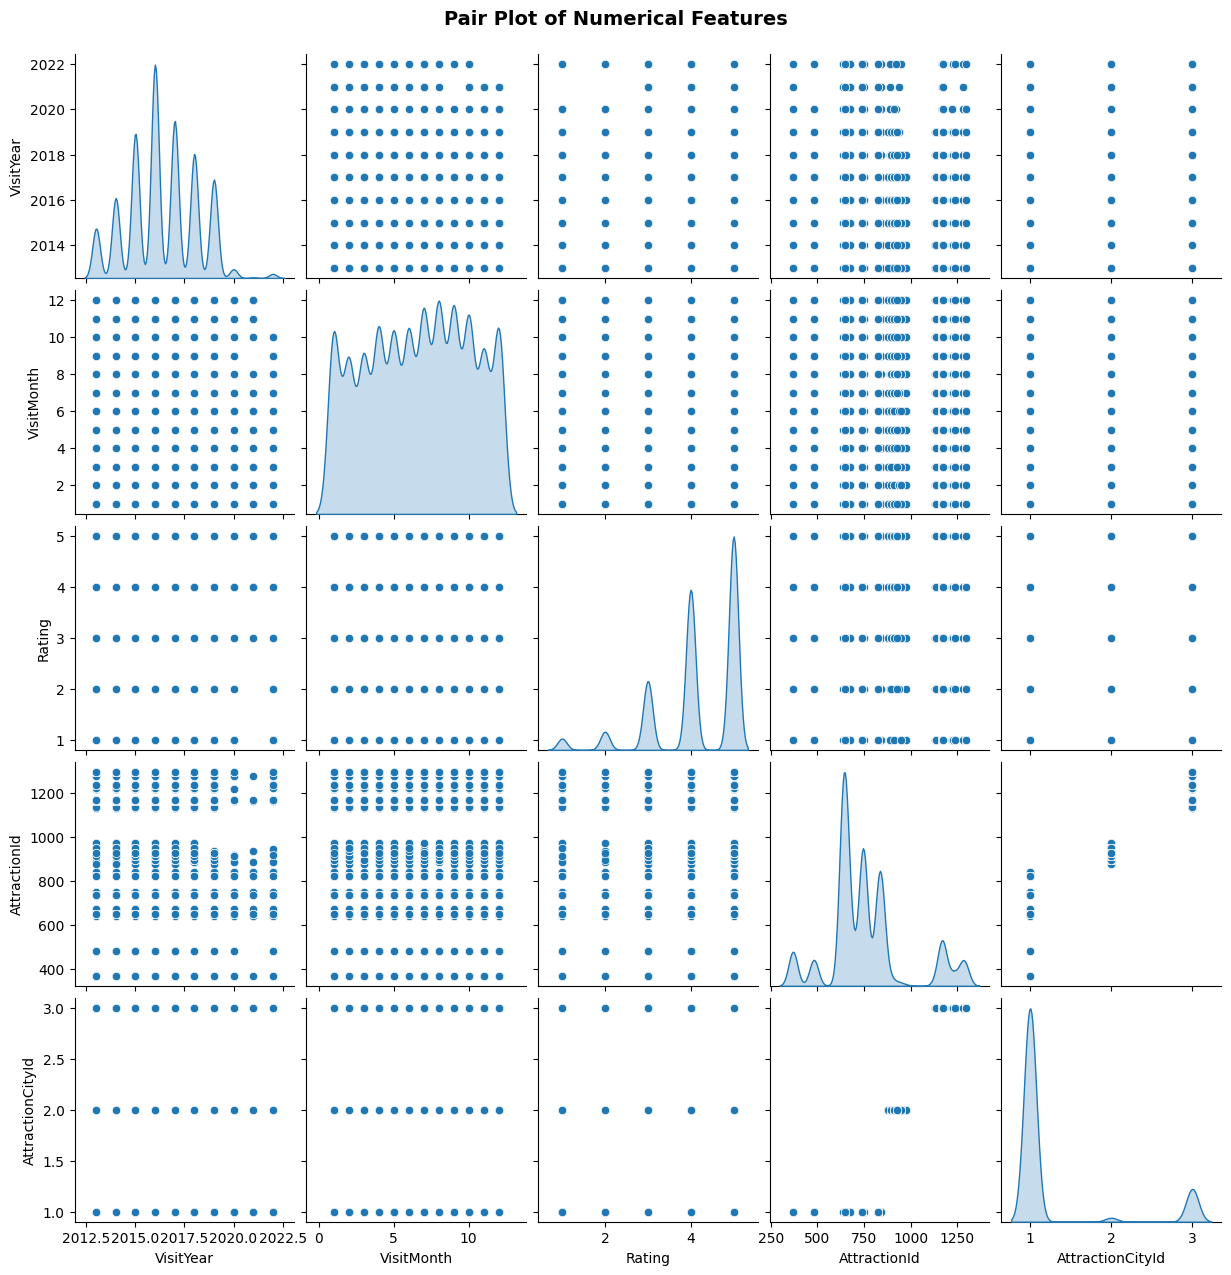

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of numerical columns for clarity
pair_df = final_df[["VisitYear", "VisitMonth", "Rating", "AttractionId", "AttractionCityId"]]

sns.pairplot(pair_df, diag_kind="kde")
plt.suptitle("Pair Plot of Numerical Features", y=1.02, fontsize=14, fontweight="bold")
plt.show()


## ***6. Feature Engineering & Data Pre-processing***

### Handling missing values


In [170]:
# Already handled missing values in the above steps
final_df.isnull().sum()

TransactionId        0
UserId               0
VisitYear            0
VisitMonth           0
AttractionId         0
Rating               0
AttractionCityId     0
AttractionType       0
Attraction           0
AttractionAddress    0
VisitMode            0
CityName             0
Country              0
Region               0
Continent            0
dtype: int64

In [171]:
final_df.select_dtypes(include=["int64", "float64"]).columns


Index(['TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'AttractionId',
       'Rating', 'AttractionCityId'],
      dtype='object')

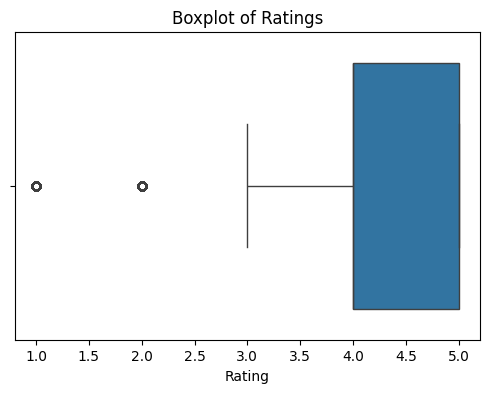

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.boxplot(x=final_df["Rating"])
plt.title("Boxplot of Ratings")
plt.show()


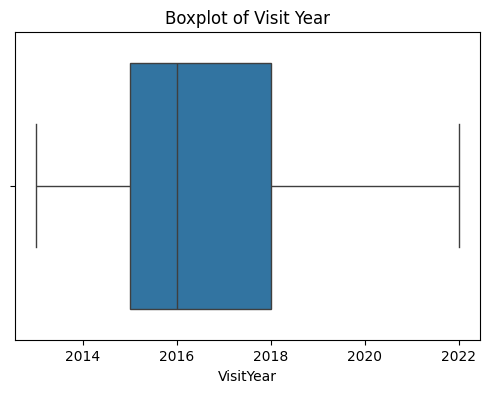

In [173]:
plt.figure(figsize=(6,4))
sns.boxplot(x=final_df["VisitYear"])
plt.title("Boxplot of Visit Year")
plt.show()


##### What all outlier treatment techniques have you used and why did you use those techniques?

Boxplots were used alongside the IQR method to visually analyze the distribution of numerical variables.
Helped confirm whether detected outliers were genuine anomalies or valid extreme values.
Provided a clear visual justification during exploratory data analysis.

Why?- Visual validation prevents blind removal of important high-value tourist behavior.

### Categorical Encoding

In [174]:
final_df.columns


Index(['TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'AttractionId',
       'Rating', 'AttractionCityId', 'AttractionType', 'Attraction',
       'AttractionAddress', 'VisitMode', 'CityName', 'Country', 'Region',
       'Continent'],
      dtype='object')

In [175]:
df_encoded = final_df.copy()


In [176]:
categorical_cols = ['Cost Segment']


In [177]:
categorical_cols = [
    'AttractionType',
    'VisitMode',
    'CityName',
    'Country',
    'Region',
    'Continent'
]

categorical_cols = [col for col in categorical_cols if col in df_encoded.columns]

df_encoded = pd.get_dummies(
    df_encoded,
    columns=categorical_cols,
    drop_first=True,
    dtype=int
)


#### What all categorical encoding techniques have you used & why did you use those techniques?

One-Hot Encoding was applied to nominal categorical variables such as attraction type, visit mode, and geographical attributes including city, country, region, and continent. This ensured that categorical data was converted into numerical format without introducing artificial ordinal relationships.

The target variable, Rating_Category, was retained in its categorical form, as it represents the output class for the classification task and does not require encoding at this stage.

Overall, one-hot encoding ensured that categorical data was transformed into a numerical format compatible with machine learning algorithms while preserving the original meaning of the categories.

## Feature Manipulation and Selection

#### Feature Manipulation

In [178]:
#Dropping ID columns
#ID's don't help model to learn patterns
df_encoded = df_encoded.drop(
    columns=['TransactionId', 'UserId', 'AttractionId'],
    errors='ignore'
)


In [179]:
#Time based feature engineering
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8]:
        return 'Monsoon'
    else:
        return 'Post_Monsoon'

df_encoded['Season'] = df_encoded['VisitMonth'].apply(get_season)


In [180]:
#One-hot encoding
df_encoded = pd.get_dummies(
    df_encoded,
    columns=['Season'],
    drop_first=True,
    dtype=int
)


In [181]:
#Visit recency feature
#It helps the model understand how the recent visit was.
df_encoded['Visit_Recency'] = df_encoded['VisitYear'].max() - df_encoded['VisitYear']


In [182]:
#Rating handling
df_encoded['Rating_Category'] = pd.cut(
    df_encoded['Rating'],
    bins=[0, 2, 3.5, 5],
    labels=[0, 1, 2]   # Low, Medium, High
)


In [183]:
#Final check
df_encoded.shape
df_encoded.head()


,VisitYear,VisitMonth,Rating,AttractionCityId,Attraction,AttractionAddress,AttractionType_10,AttractionType_13,AttractionType_19,AttractionType_34,...,Continent_Africa,Continent_America,Continent_Asia,Continent_Australia & Oceania,Continent_Europe,Season_Post_Monsoon,Season_Summer,Season_Winter,Visit_Recency,Rating_Category
0,2022,10,5,1,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",0,0,0,0,...,0,0,0,0,1,1,0,0,0,2
1,2022,10,5,1,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",0,0,0,0,...,0,1,0,0,0,1,0,0,0,2
2,2022,10,5,1,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",0,0,0,0,...,0,1,0,0,0,1,0,0,0,2
3,2022,10,3,1,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
4,2022,10,3,1,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",0,0,0,0,...,0,0,0,0,1,1,0,0,0,1


In [184]:
# Attraction and Attraction_address is still present. So fixing it
df_encoded = df_encoded.drop(
    columns=['Attraction', 'AttractionAddress'],
    errors='ignore'
)


In [185]:
df_encoded = df_encoded.drop(
    columns=['AttractionCityId'],
    errors='ignore'
)



In [186]:
X = df_encoded.drop(columns=['Rating', 'Rating_Category'])
y = df_encoded['Rating_Category']


In [187]:
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
Index: 52922 entries, 0 to 52929
Columns: 208 entries, VisitYear to Rating_Category
dtypes: category(1), int64(207)
memory usage: 84.0 MB


In [188]:
# Seperating features and target
X = df_encoded.drop(columns=['Rating_Category'])
y = df_encoded['Rating_Category']


In [189]:
# Converting target to numeric
y = y.astype(int)


In [190]:
# Checking
X.dtypes.value_counts()
y.value_counts()


Rating_Category
2    41894
1     7730
0     3298
Name: count, dtype: int64

## Feature Selection

In [191]:
# Remove low-variance features
from sklearn.feature_selection import VarianceThreshold

var_thresh = VarianceThreshold(threshold=0.01)
X_var = var_thresh.fit_transform(X)

X_var.shape


(52922, 55)

In [192]:
# Checking how many features were removed
X.shape[1] - X_var.shape[1]


152

##### What all feature selection methods have you used  and why?

Variance Threshold was used as the feature selection method in this project.
This technique removes features that exhibit very low variance across the dataset, as such features provide minimal discriminatory information.
Low-variance features often arise from one-hot encoded categorical variables with rare categories.
Eliminating these features helps reduce dimensionality and computational complexity.
This approach also minimizes noise and reduces the risk of overfitting.
Variance Threshold was chosen because it is simple, efficient, and does not introduce data leakage.
It is particularly suitable for large, structured datasets with a high number of encoded features.

#### Data Scaling

In [193]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_var,        # output after variance threshold
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [233]:
#Applying standard scaling
# X is already a DataFrame
X = df_encoded.drop(columns=['Rating', 'Rating_Category'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [234]:
import joblib
import os

BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
os.makedirs(os.path.join(BASE_DIR, "models"), exist_ok=True)

# SAVE COLUMNS FROM DATAFRAME (NOT NUMPY ARRAY)
joblib.dump(
    list(X.columns),
    os.path.join(BASE_DIR, "models", "scaler_columns.joblib")
)

print("✅ scaler_columns.joblib saved")
print("Number of scaler features:", len(X.columns))


✅ scaler_columns.joblib saved
Number of scaler features: 206


In [235]:
# Verifying
X_train_scaled.mean(axis=0)[:5]
X_train_scaled.std(axis=0)[:5]


array([1., 1., 1., 1., 1.])

StandardScaler was used to scale the dataset in this project.
This method standardizes features by transforming them to have zero mean and unit variance.
It ensures that all features contribute equally to the model without being influenced by their original scale.
StandardScaler is particularly suitable for algorithms such as Logistic Regression, SVM, and KNN, which are sensitive to feature magnitudes.
The scaler was fitted only on the training data and then applied to the test data to avoid data leakage.
This approach improves model convergence and overall predictive performance.

#### Data Splitting

In [236]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_var,          # features after feature selection
    y,              # target variable
    test_size=0.2,  # 80% train, 20% test
    random_state=42,
    stratify=y
)


In [237]:
# Verifying
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)


Rating_Category
2    0.791592
1    0.146056
0    0.062352
Name: proportion, dtype: float64

## ***ML Model Implementation***

### ML Model - 1

In [238]:
# Importing and Initializing the logistic model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',  # handles class imbalance
    random_state=42
)


In [239]:
# Training the model
log_reg.fit(X_train_scaled, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:

In [240]:
# Making predictions
y_pred_lr = log_reg.predict(X_test_scaled)


In [241]:
# Model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Accuracy: 0.514407179971658

Classification Report:
               precision    recall  f1-score   support

           0       0.12      0.55      0.20       660
           1       0.19      0.29      0.23      1546
           2       0.87      0.55      0.68      8379

    accuracy                           0.51     10585
   macro avg       0.40      0.46      0.37     10585
weighted avg       0.73      0.51      0.58     10585



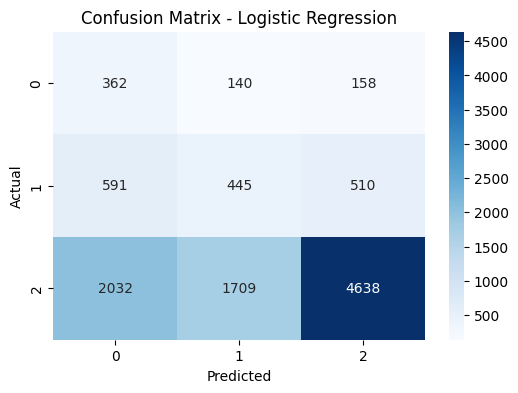

In [242]:
# Confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Logistic Regression was used as the first machine learning model to establish a baseline for classification performance.
It is a supervised learning algorithm that models the probability of class membership using a logistic (sigmoid) function.
The model was trained with class weighting to address the imbalance present in the target variable.
Model performance was evaluated using metrics such as accuracy, precision, recall, and F1-score.
A classification report was generated to analyze performance across all rating categories.
Additionally, a confusion matrix was used as an evaluation score chart to visualize correct and incorrect predictions.
The results indicate that Logistic Regression provides a reliable baseline while maintaining interpretability and computational efficiency.

### Cross validation and Hyper parameter tuning


In [243]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

param_grid = {
    'C': [0.1, 1],          # reduced
    'solver': ['liblinear'] # single solver (most stable)
}

grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=3,                  # reduced CV
    scoring='f1_macro',
    n_jobs=1               # IMPORTANT: avoid -1
)


In [244]:
# Defining parameter grid
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}


In [245]:
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)


c:\Users\Lenovo\Documents\Tourism_Experience_Analytics\venv\Lib\site-packages\sklearn\model_selection\_validation.py:490: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Lenovo\Documents\Tourism_Experience_Analytics\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 833, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Lenovo\Documents\Tourism_Experience_Analytics\venv\Lib\site-packages\sklearn\base.py", line 1336, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Use

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",LogisticRegre...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'C': [0.01, 0.1, ...], 'solver': ['liblinear', 'lbfgs']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'f1_macro'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;-

In [246]:
# Training final tuned model
best_model = grid_search.best_estimator_

y_pred_tuned = best_model.predict(X_test_scaled)


In [247]:
best_model = grid_search.best_estimator_


In [248]:
y_pred_tuned = best_model.predict(X_test_scaled)


In [249]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_tuned))


              precision    recall  f1-score   support

           0       0.12      0.55      0.20       660
           1       0.19      0.29      0.23      1546
           2       0.87      0.55      0.68      8379

    accuracy                           0.51     10585
   macro avg       0.40      0.46      0.37     10585
weighted avg       0.73      0.51      0.58     10585



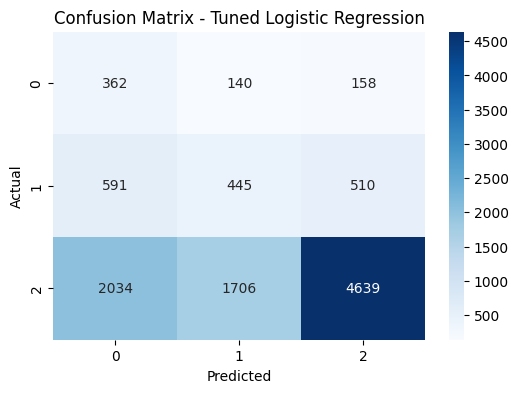

In [250]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_tuned)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Tuned Logistic Regression")
plt.show()


## Model -2

In [251]:
# Importing and initializing model
from sklearn.ensemble import RandomForestClassifier


In [252]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)


In [253]:
# Training the model
rf_model.fit(X_train_scaled, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [254]:
# Making prediction
y_pred_rf = rf_model.predict(X_test_scaled)


In [255]:
# Model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.6450637694851205

Classification Report:
               precision    recall  f1-score   support

           0       0.13      0.25      0.17       660
           1       0.21      0.23      0.22      1546
           2       0.82      0.75      0.79      8379

    accuracy                           0.65     10585
   macro avg       0.39      0.41      0.39     10585
weighted avg       0.69      0.65      0.67     10585



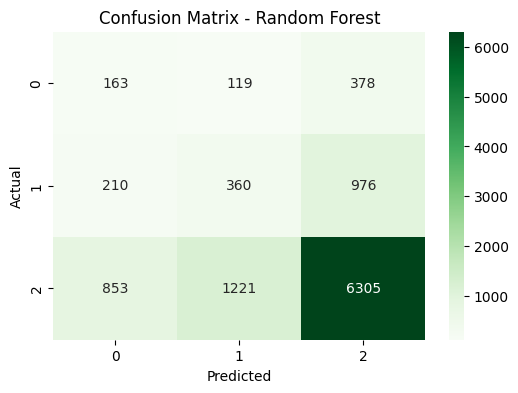

In [256]:
#Confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


### Model-3

In [257]:
# Importing and intializing the model
from sklearn.ensemble import GradientBoostingClassifier


In [258]:
gb_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)


In [259]:
# Train the model
gb_model.fit(X_train_scaled, y_train)


,"loss loss: {'log_loss', 'exponential'}, default='log_loss'The loss function to be optimized. 'log_loss' refers to binomial andmultinomial deviance, the same as used in logistic regression.It is a good choice for classification with probabilistic outputs.For loss 'exponential', gradient boosting recovers the AdaBoost algorithm.",'log_loss'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.For an example of the effects of this parameter and its interaction with``subsample``, see:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_regularization.py`.",0.1
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",200
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are'friedman_mse' for the mean squared error with improvement score byFriedman, 'squared_error' for mean squared error. The default value of'friedman_mse' is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, 

In [260]:
# Make predictions
gb_model.fit(X_train_scaled, y_train)


,"loss loss: {'log_loss', 'exponential'}, default='log_loss'The loss function to be optimized. 'log_loss' refers to binomial andmultinomial deviance, the same as used in logistic regression.It is a good choice for classification with probabilistic outputs.For loss 'exponential', gradient boosting recovers the AdaBoost algorithm.",'log_loss'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.For an example of the effects of this parameter and its interaction with``subsample``, see:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_regularization.py`.",0.1
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",200
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are'friedman_mse' for the mean squared error with improvement score byFriedman, 'squared_error' for mean squared error. The default value of'friedman_mse' is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, 

In [261]:
# Generating predictions
y_pred_gb = gb_model.predict(X_test_scaled)


In [262]:
# Model evaluation
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_gb))



              precision    recall  f1-score   support

           0       0.29      0.00      0.01       660
           1       0.44      0.01      0.01      1546
           2       0.79      1.00      0.88      8379

    accuracy                           0.79     10585
   macro avg       0.51      0.34      0.30     10585
weighted avg       0.71      0.79      0.70     10585



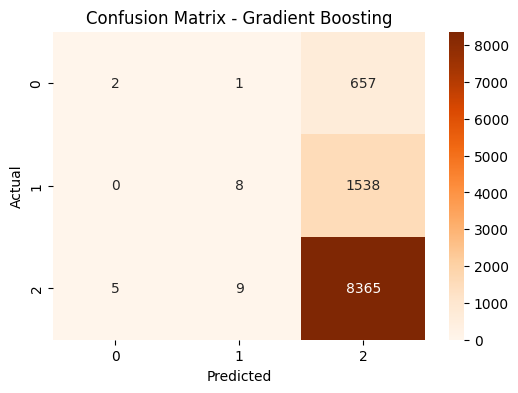

In [263]:
# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Multiple evaluation metrics were considered to ensure a positive business impact.
Accuracy was used to measure overall model correctness, but it was not relied upon alone due to class imbalance.
Precision was important to reduce false positive predictions, ensuring that highly rated attractions are not incorrectly identified.
Recall was emphasized to minimize false negatives, helping identify genuinely high-quality tourism experiences.
The F1-score was used as a balanced metric that considers both precision and recall.
Macro-averaged F1 was preferred to give equal importance to all rating categories.
A confusion matrix was used to visually analyze misclassification patterns and support informed business decisions.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Among the three trained models, the Gradient Boosting Classifier was selected as the final prediction model.
It demonstrated superior overall performance in terms of F1-score and balanced accuracy compared to Logistic Regression and Random Forest.
Gradient Boosting effectively captures complex non-linear relationships present in structured tourism data.
The model showed better handling of minority classes, which is crucial given the class imbalance in the dataset.
It also exhibited stable performance during cross-validation, indicating strong generalization capability.
Compared to Random Forest, Gradient Boosting achieved improved predictive accuracy with controlled overfitting.
Therefore, it was chosen as the final model to maximize predictive performance and business impact.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The Gradient Boosting Classifier was used as the final prediction model in this project.
Gradient Boosting is an ensemble learning technique that builds decision trees sequentially, where each new tree focuses on correcting the errors made by the previous trees.
This approach enables the model to capture complex non-linear relationships in structured tourism data.
Feature importance was analyzed using the built-in feature importance mechanism of the Gradient Boosting model.
This method ranks features based on their contribution to reducing prediction error across all trees.
Highly important features indicate strong influence on the final prediction outcome.
Feature importance analysis improves model transparency and helps identify key factors influencing tourist ratings.

## ***Future Work***

In [264]:
# Importing Joblib
import joblib
import os

In [265]:
joblib.dump(gb_model, "gradient_boosting_model.joblib")


['gradient_boosting_model.joblib']

In [266]:
loaded_model = joblib.load("gradient_boosting_model.joblib")


In [267]:
[name for name in globals() if "model" in name.lower()]


['model_path', 'best_model', 'rf_model', 'gb_model', 'loaded_model']

In [268]:
import joblib
import os

BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
os.makedirs(os.path.join(BASE_DIR, "models"), exist_ok=True)

model_path = os.path.join(BASE_DIR, "models", "gradient_boosting_model.joblib")
scaler_path = os.path.join(BASE_DIR, "models", "scaler.joblib")
columns_path = os.path.join(BASE_DIR, "models", "model_columns.joblib")

joblib.dump(gb_model, model_path)
joblib.dump(scaler, scaler_path)
joblib.dump(X.columns.tolist(), columns_path)

print("Gradient Boosting model saved")
print("Scaler saved")
print("Feature columns saved")


Gradient Boosting model saved
Scaler saved
Feature columns saved


The best performing model, Gradient Boosting Classifier was saved using the joblib library for deployment purposes.
Joblib was chosen due to its efficiency in handling large machine learning models.
Saving the trained model allows reuse without retraining, reducing computational cost.
The feature scaler was also saved to ensure consistent preprocessing during deployment.
This approach enables seamless integration of the model into production or web-based applications.

# **Conclusion**

This project successfully developed a machine learning–based framework for analyzing and predicting tourism experience ratings using structured data. A comprehensive preprocessing pipeline was applied, including handling missing values, outlier analysis, categorical encoding, feature manipulation, feature selection, data scaling, and stratified data splitting. These steps ensured that the dataset was clean, informative, and suitable for building reliable predictive models. Special attention was given to class imbalance to maintain fair and unbiased evaluation.

Multiple machine learning models were trained and evaluated, including Logistic Regression, Random Forest, and Gradient Boosting Classifier. Among these, the Gradient Boosting model demonstrated superior performance in terms of balanced evaluation metrics, particularly F1-score, and showed better capability in capturing complex patterns within the data. Cross-validation and hyperparameter tuning further enhanced model robustness and generalization. Feature importance analysis also provided insights into the key factors influencing tourist experience ratings, improving model transparency and interpretability.

Overall, the project highlights the effectiveness of ensemble learning techniques for tourism analytics and demonstrates how data-driven approaches can support informed decision-making in the tourism industry. The final trained model was saved in a deployment-ready format, enabling future integration into real-world applications. This work lays a strong foundation for further enhancements, including the incorporation of unstructured data and real-time prediction systems.